In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(250,250,3)))
model.add(Conv2D(94,(3,3),input_shape = (250,250,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(72,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(68,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'sigmoid', units=1)) 
 


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 94)      2632      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 94)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 72)      60984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 72)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 68)        44132     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 68)       0

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        "C:\\Users\\pasup\\Deep_Learning\\helmet_prediction-master\\helmet_detection-20190906T080632Z-001\\helmet_detection\\training",
        target_size=(250, 250),
        class_mode='binary')

Found 647 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        "C:\\Users\\pasup\\Deep_Learning\\helmet_prediction-master\\helmet_detection-20190906T080632Z-001\\helmet_detection\\testing",
        target_size=(250, 250),
        class_mode='binary')

Found 208 images belonging to 2 classes.


In [9]:
model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set)


C:\Users\pasup\AppData\Local\Temp\ipykernel_16916\2218545451.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/15
21/21 [==============================] - 58s 3s/step - loss: 0.6648 - accuracy: 0.5688 - val_loss: 0.5817 - val_accuracy: 0.8413
Epoch 2/15
21/21 [==============================] - 58s 3s/step - loss: 0.5217 - accuracy: 0.7450 - val_loss: 0.3500 - val_accuracy: 0.8606
Epoch 3/15
21/21 [==============================] - 53s 3s/step - loss: 0.3793 - accuracy: 0.8331 - val_loss: 0.3230 - val_accuracy: 0.8413
Epoch 4/15
21/21 [==============================] - 49s 2s/step - loss: 0.3297 - accuracy: 0.8547 - val_loss: 0.3232 - val_accuracy: 0.8558
Epoch 5/15
21/21 [==============================] - 50s 2s/step - loss: 0.3086 - accuracy: 0.8563 - val_loss: 0.2395 - val_accuracy: 0.8894
Epoch 6/15
21/21 [==============================] - 49s 2s/step - loss: 0.3172 - accuracy: 0.8485 - val_loss: 0.2663 - val_accuracy: 0.8990
Epoch 7/15
21/21 [==============================] - 50s 2s/step - loss: 0.2272 - accuracy: 0.9011 - val_loss: 0.2704 - val_accuracy: 0.8606
Epoch 8/15
21/21 [==

In [10]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [14]:
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [15]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img("C:\\Users\\pasup\\Deep_Learning\\helmet_prediction-master\\helmet_detection-20190906T080632Z-001\\helmet_detection\\testing\\with helmet\\images (361).jpg"
                           ,target_size =(250,250))


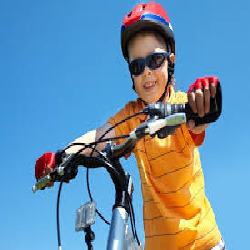

In [16]:
test_image

In [17]:
## Convert image to array
test_image = image.img_to_array(test_image)
test_image.shape

(250, 250, 3)

In [18]:
test_image=test_image.reshape(1,250, 250, 3)

In [19]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
result

1/1 [==============================] - 0s 154ms/step


array([[0.]], dtype=float32)

In [20]:
## Class label of dog and cat

if result == 0:
    prediction = 'with helmet'
else:
    prediction = 'without helmet'
    
prediction

'with helmet'

In [21]:
test_image1= image.load_img("C:\\Users\\pasup\\Deep_Learning\\helmet_prediction-master\\helmet_detection-20190906T080632Z-001\\helmet_detection\\testing\\without helmet\\114.jpg"
                           ,target_size =(250,250))


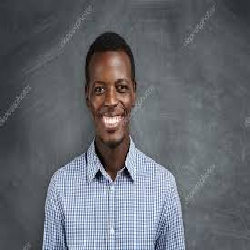

In [22]:
test_image1

In [23]:
test_image1 = image.img_to_array(test_image1)
test_image1.shape

(250, 250, 3)

In [ ]:
result1 = model.predict(test_image1)
result1

In [ ]:
## Class label of dog and cat

if result1 == 0:
    prediction = 'with helmet'
else:
    prediction = 'without helmet'
    
prediction

In [13]:
model.save("helmet_detection_model99.h5")  # Keras model
